In [1]:
from google.colab import files
uploaded = files.upload()


Saving Train.csv to Train.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Train.csv")
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.shape

(10999, 12)

In [5]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
df.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
for col in df.select_dtypes(include='object'):
    print(col, df[col].unique())

Warehouse_block ['D' 'F' 'A' 'B' 'C']
Mode_of_Shipment ['Flight' 'Ship' 'Road']
Product_importance ['low' 'medium' 'high']
Gender ['F' 'M']


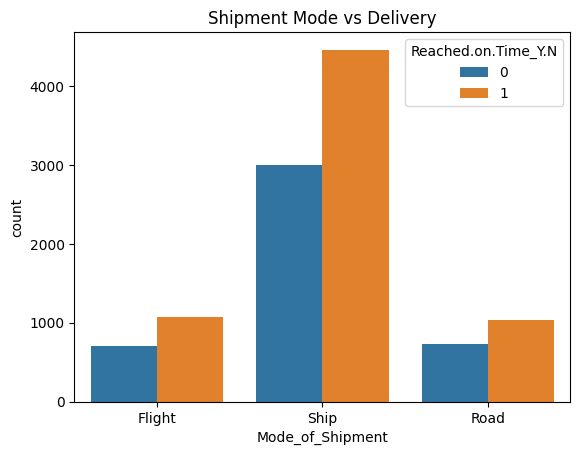

In [12]:
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df)
plt.title("Shipment Mode vs Delivery")
plt.show()

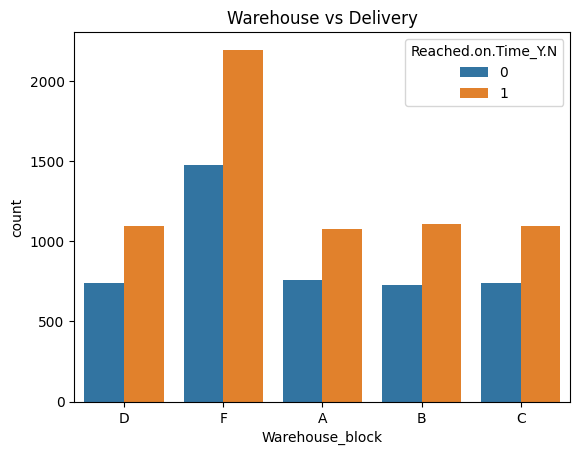

In [13]:
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=df)
plt.title("Warehouse vs Delivery")
plt.show()

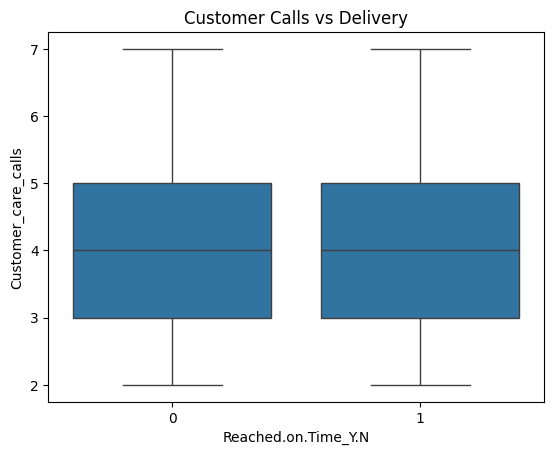

In [14]:
sns.boxplot(x='Reached.on.Time_Y.N', y='Customer_care_calls', data=df)
plt.title("Customer Calls vs Delivery")
plt.show()

In [15]:
avg_cost = df['Cost_of_the_Product'].mean()
print("Average cost:", avg_cost)

high_cost = df[df['Cost_of_the_Product'] > avg_cost]
low_cost = df[df['Cost_of_the_Product'] <= avg_cost]

print("High cost shipments:", len(high_cost))

Average cost: 210.19683607600692
High cost shipments: 5714


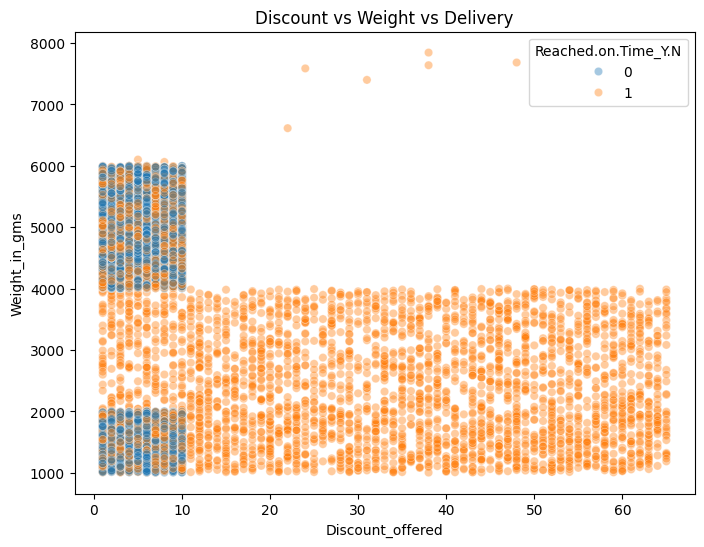

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Discount_offered',
    y='Weight_in_gms',
    hue='Reached.on.Time_Y.N',
    alpha=0.4
)
plt.title("Discount vs Weight vs Delivery")
plt.show()

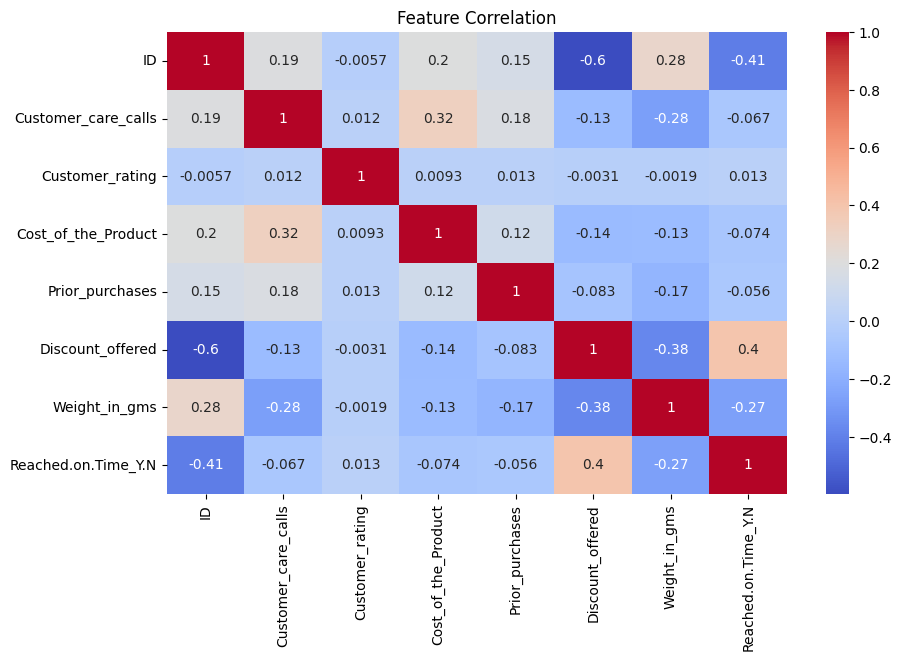

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


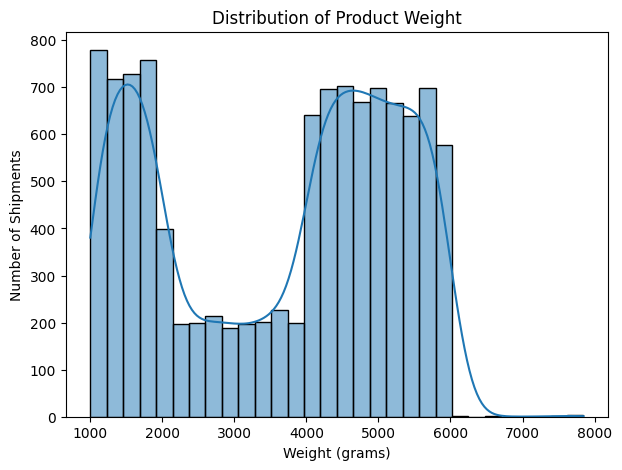

In [21]:
plt.figure(figsize=(7,5))
sns.histplot(df['Weight_in_gms'], bins=30, kde=True)

plt.title("Distribution of Product Weight")
plt.xlabel("Weight (grams)")
plt.ylabel("Number of Shipments")

plt.show()


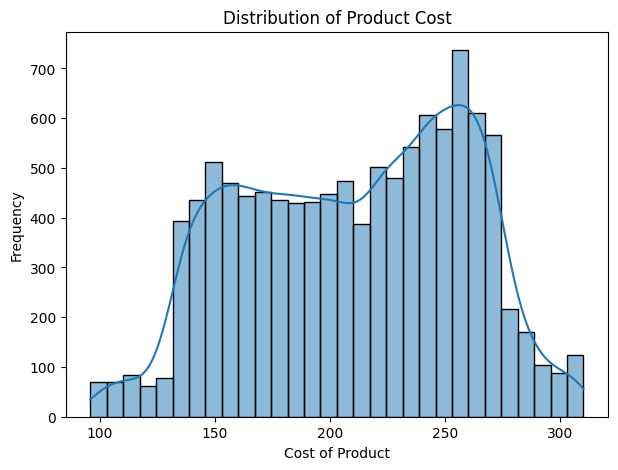

In [23]:
plt.figure(figsize=(7,5))
sns.histplot(df['Cost_of_the_Product'], bins=30, kde=True)

plt.title("Distribution of Product Cost")
plt.xlabel("Cost of Product")
plt.ylabel("Frequency")

plt.show()


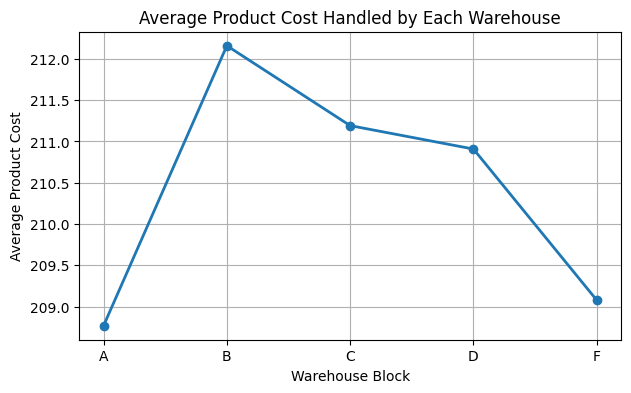

In [26]:
warehouse_cost = df.groupby('Warehouse_block')['Cost_of_the_Product'].mean()

plt.figure(figsize=(7,4))
plt.plot(warehouse_cost.index, warehouse_cost.values, marker='o', linewidth=2)

plt.title("Average Product Cost Handled by Each Warehouse")
plt.xlabel("Warehouse Block")
plt.ylabel("Average Product Cost")

plt.grid(True)
plt.show()


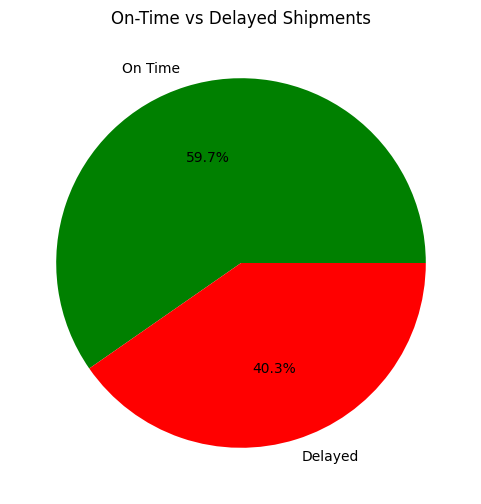

In [24]:
delivery_counts = df['Reached.on.Time_Y.N'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(delivery_counts,
        labels=['On Time','Delayed'],
        autopct='%1.1f%%',
        colors=['green','red'])

plt.title("On-Time vs Delayed Shipments")
plt.show()


In [18]:
df.skew(numeric_only=True)

,0
ID,0.000000
Customer_care_calls,0.391926
Customer_rating,0.004360
Cost_of_the_Product,-0.157117
Prior_purchases,1.681897
Discount_offered,1.798929
Weight_in_gms,-0.249747
Reached.on.Time_Y.N,-0.394257


In [27]:
summary = df.groupby('Reached.on.Time_Y.N').agg({
    'Cost_of_the_Product':'mean',
    'Discount_offered':'mean',
    'Weight_in_gms':'mean',
    'Customer_care_calls':'mean',
    'Customer_rating':'mean',
    'Prior_purchases':'mean'
})
summary


,Cost_of_the_Product,Discount_offered,Weight_in_gms,Customer_care_calls,Customer_rating,Prior_purchases
Reached.on.Time_Y.N,,,,,,
0,214.498647,5.545987,4168.668395,4.147656,2.967989,3.670424
1,207.289197,18.663721,3272.640104,3.991467,3.005790,3.498095
